## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [3]:
import pandas as pd

url = "../data/togo-dapaong_qc.csv"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()


(525600, 19)


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

# 1. Summary Statistics & Missing-Value Report

In [4]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
85583   2021-12-23 10:24  800.0  843.5  156.0  873.0  840.0  28.8  17.0  4.8   
103265  2022-01-04 17:06   82.9    0.0   82.2   79.1   77.6  29.1  21.7  1.7   
355580  2022-06-28 22:21   -1.1    0.0    0.0    0.0    0.0  26.1  90.3  1.2   
474999  2022-09-19 20:40   -1.5    0.0    0.0    0.0    0.0  23.9  94.6  0.0   
56934   2021-12-03 12:55  775.4  546.4  328.2  845.7  826.0  35.6  17.6  3.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
85583      5.9      0.6   97.0     16.7  977         0            0.0   41.4   
103265     2.4      0.5   88.4     10.0  976         0            0.0   30.2   
355580     1.6      0.4  236.1      6.1  978         0            0.0   25.5   
474999     0.0      0.0    0.0      0.0  975         0            0.0   23.2   
56934      4.9      0.6  124.9     24.8  974         0            0.0   51.6   

        TModB  Comments  
85583    47.2       NaN  
103265   30.1       NaN  
355580   25.2       NaN  
474999   22.9       NaN  
56934    54.4       NaN

In [5]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000

In [7]:
# Calculate percentage of missing values per column
null_percent = (df.isna().sum() / len(df)) * 100

# Filter columns with >5% missing values
cols_over_5 = null_percent[null_percent > 5]

# Display the result
print("Columns with more than 5% missing values:")
#print(cols_over_5)
# Calculate percent of missing values
null_percent = (df.isna().sum() / len(df)) * 100

# List columns with >5% nulls
cols_over_5 = null_percent[null_percent > 5].index.tolist()

print("Columns with >5% nulls:", cols_over_5)


Columns with more than 5% missing values:
Columns with >5% nulls: ['Comments']


# 2. Outlier Detection & Basic Cleaning

## Check missing values

In [8]:
# Columns to check for missing values
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

print("Missing values in key columns:")
df[cols_to_check].isna().sum()


Missing values in key columns:


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

## Check Incorrect / Impossible Values

In [12]:
print("Incorrect or impossible entries (negative values):")

for col in cols_to_check:
    invalid_rows = df[df[col] < 0]
    count_invalid = len(invalid_rows)
    print(f"{col}: {count_invalid} incorrect values found")


Incorrect or impossible entries (negative values):
GHI: 257385 incorrect values found
DNI: 0 incorrect values found
DHI: 0 incorrect values found
ModA: 0 incorrect values found
ModB: 0 incorrect values found
WS: 0 incorrect values found
WSgust: 0 incorrect values found



## Outlier Detection Using IQR Method

In [13]:

print("\nOutlier Detection ")

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outlier rows")



Outlier Detection 
GHI: 1303 outlier rows
DNI: 50586 outlier rows
DHI: 7905 outlier rows
ModA: 1237 outlier rows
ModB: 1537 outlier rows
WS: 8708 outlier rows
WSgust: 7377 outlier rows


## Z-scores and flag rows with |Z| > 3

In [14]:
from scipy.stats import zscore
z_scores = df[cols_to_check].apply(zscore)

# Flag rows where any column has |Z| > 3
outliers_mask = (np.abs(z_scores) > 3).any(axis=1)
outlier_rows = df[outliers_mask]

print("Number of rows with |Z| > 3:", outliers_mask.sum())
print(outlier_rows)

Number of rows with |Z| > 3: 9251
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4985    2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5410    2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5411    2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5413    2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5420    2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
510473  2022-10-14 11:54   709.5   63.7  629.8   703.1   694.9  30.2  66.6   
510474  2022-10-14 11:55   677.8   40.6  621.7   670.1   662.2  30.2  66.7   
510475  2022-10-14 11:56   659.5   29.7  614.9   651.0   643.4  30.3  66.1   
510476  2022-10-14 11:57   660.1   40.7  605.6   653.2   645.6  30.2  66.0   
510477  2022-10-14 11:58   655.8   50.2  591.0   647.5   639.9  30.2  66.2   

         WS  WSgust  WSstdev 

## Handle Missing Values in Key Columns

In [16]:
df_dropped = df.dropna(subset=cols_to_check)
print("Shape after dropping rows with missing values:", df_dropped.shape)

# Option 2: Impute missing values with median
df_imputed = df.copy()
for col in cols_to_check:
    median_value = df_imputed[col].median()
    df_imputed[col].fillna(median_value)

print("Missing values after median imputation:\n", df_imputed[cols_to_check].isna().sum())

Shape after dropping rows with missing values: (525600, 19)
Missing values after median imputation:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


## saving clean data

In [34]:
import os

df_clean = df_imputed[~outliers_mask]  # keep only rows where all |Z| <= 3
print("After removing Z-score outliers:", df_clean.shape)
os.makedirs("data", exist_ok=True)
output_file = "../data/togo_clean.csv"
df_clean.to_csv(output_file, index=False)
print("Cleaned dataset saved to:", output_file)

After removing Z-score outliers: (516349, 19)
Cleaned dataset saved to: ../data/togo_clean.csv


## Time Series Analysis

## Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp

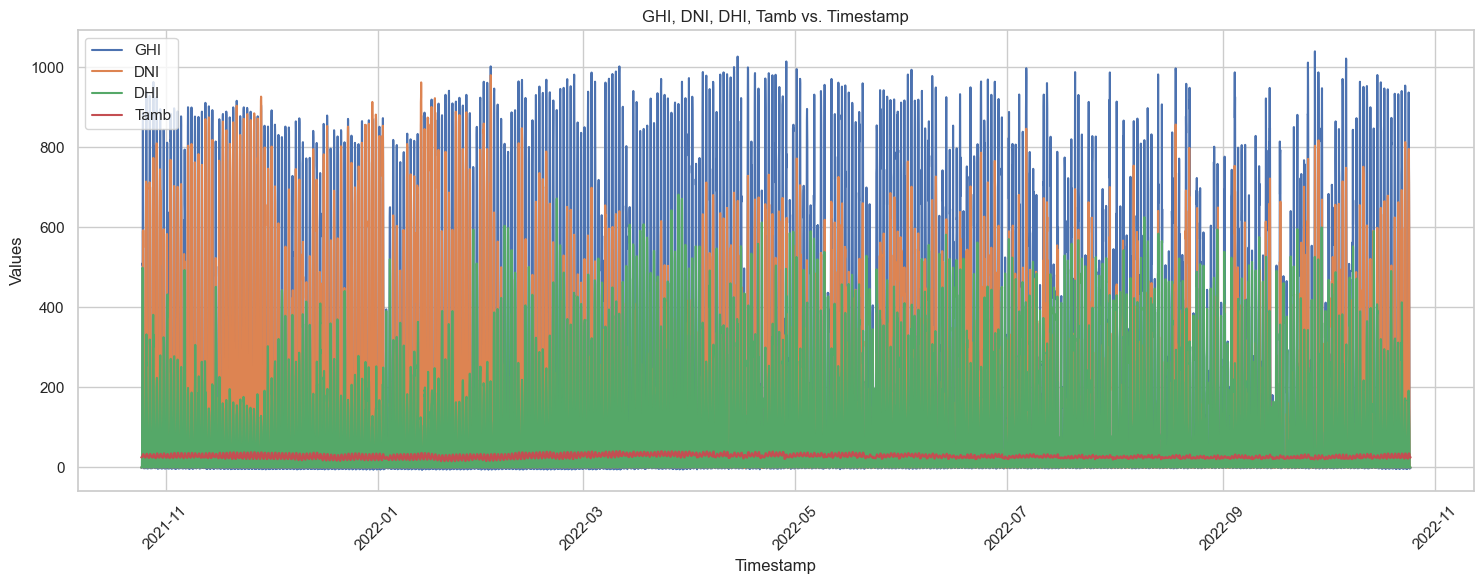

In [35]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Optional: resample hourly to reduce overplotting
df_hourly = df.set_index('Timestamp').resample('h').mean()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observe patterns by month, trends throughout the day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 



## Seasonal Patterns and Trends by Month

The plot shows distinct seasonal variation, primarily driven by the change in the strength and duration of **solar irradiance**.

* **Winter Months (Approx. Nov 2021 - Feb 2022):**
    * **Lower Irradiance Peaks:** The maximum values for GHI and DNI are generally **lower** compared to the summer months, often peaking around **900 W/$m^2$** or slightly above.
    * **Higher DHI Contribution:** The green area, representing **DHI** (diffuse sunlight due to clouds/haze), appears to constitute a relatively **larger fraction** of the total GHI on many days, suggesting more frequent cloudy or hazy conditions.
* **Summer Months (Approx. May 2022 - Aug 2022):**
    * **Highest Irradiance Peaks:** GHI and DNI frequently reach and exceed **1000 W/$m^2$**, indicating maximum solar intensity.
    * **More Intermittent DNI:** While peaks are higher, the DNI (orange) shows more frequent and sharp drops to zero, suggesting a highly **variable mix of clear and cloudy/overcast periods** during the day, which is typical for many climates.
* **Shoulder Months (Spring/Autumn):**
    * **Spring (Mar - Apr 2022):** Shows a transition with increasing GHI and DNI peaks.
    * **Autumn (Sep - Oct 2022):** Shows the decrease in peak irradiance values, similar to the beginning of the plot.

---

## Daily Trends and Variability

The data is plotted across a full year, but the vertical bars inherently show **daily cycles**:

* **Solar Irradiance (GHI, DNI, DHI):** These values consistently **rise and fall to zero** within each 24-hour period, representing the day-night cycle (sunlight is only present during the day).
    * **GHI (Blue):** The **total solar energy** received; it is the sum of DNI (on a horizontal surface) and DHI. Its peaks represent the midday maximum.
    * **DNI (Orange):** Represents **direct, clear-sky sunlight**. Sharp peaks and troughs within a day often signify the sun moving in and out of **clouds** (i.e., when a cloud blocks the sun, DNI drops sharply).
    * **DHI (Green):** Represents **diffuse sunlight**. It generally **increases** when DNI drops due to cloud cover, as the clouds scatter the sunlight.

* **Ambient Temperature ($T_{amb}$) (Red):**
    * The temperature trace is a **thin, low line** near the x-axis, typically around **0 to 100** on the value scale (though the units are not specified, it's clearly much lower than irradiance).
    * It shows a relatively **smooth daily trend** with peaks during the day and troughs at night, but the annual visual variation is minimal compared to the irradiance.

## Anomalies and Fluctuations 

* **Irradiance Peaks:** The **GHI** frequently hits peaks around **1000 W/$m^2$** or slightly higher, especially in the summer. These are not anomalies but the expected maximum intensity for the location, often referred to as **peak sun hours**.
* **Irradiance Fluctuations (Cloud Dynamics):** The most notable fluctuations are the **rapid, high-frequency drops and rises in DNI and GHI** throughout many days. These "spiky" patterns are characteristic of **partially cloudy conditions**, where the sun is quickly moving in and out of cloud cover.
* **DNI vs. DHI Relationship:** On days where GHI is high but DNI is very low, it indicates a **fully overcast day** (high GHI is only possible if DHI is very high, but this scenario is less common in the plot than partly cloudy days). More commonly, you see the **inverse relationship** where a sharp drop in DNI is *partially* compensated by an increase in DHI, keeping the GHI stable or slightly reduced.
* **Temperature Consistency:** The $T_{amb}$ trace is remarkably **flat and consistent** across the year compared to the irradiance data, suggesting a location with a mild climate or that the range of temperature variation is very small relative to the scale used for irradiance.

## Cleaning Impact

## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

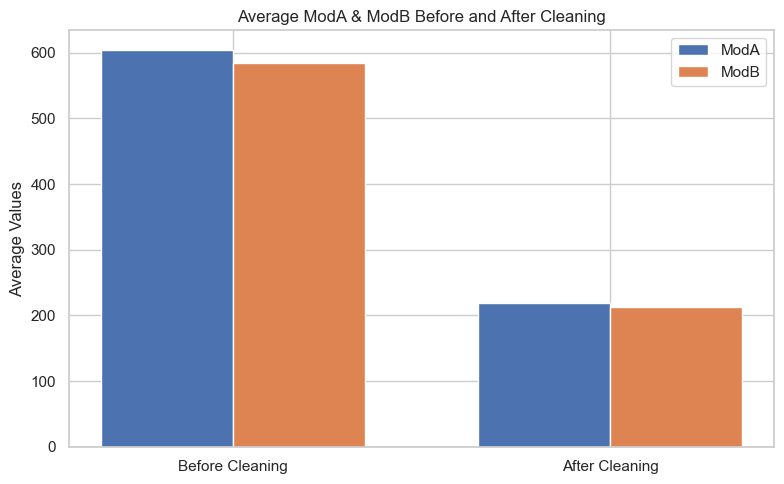

   Cleaning_Flag        ModA        ModB  Cleaning_Status
0              0  603.659248  584.626257  Before Cleaning
1              1  219.380751  213.028150   After Cleaning


In [36]:
## Cleaning Impact
## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

# Create a 'Cleaning_Flag' column
# (1 = kept after cleaning, 0 = removed as outlier)
df['Cleaning_Flag'] = np.where(outliers_mask, 0, 1)

# Group by Cleaning flag
mod_stats = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

# Rename for readability
mod_stats['Cleaning_Status'] = mod_stats['Cleaning_Flag'].map({1: 'After Cleaning', 0: 'Before Cleaning'})

# Plot
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(mod_stats['Cleaning_Status']))

plt.bar(x - bar_width/2, mod_stats['ModA'], width=bar_width, label='ModA')
plt.bar(x + bar_width/2, mod_stats['ModB'], width=bar_width, label='ModB')

plt.xticks(x, mod_stats['Cleaning_Status'])
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Before and After Cleaning')
plt.legend()
plt.tight_layout()
plt.show()

print(mod_stats)


## Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

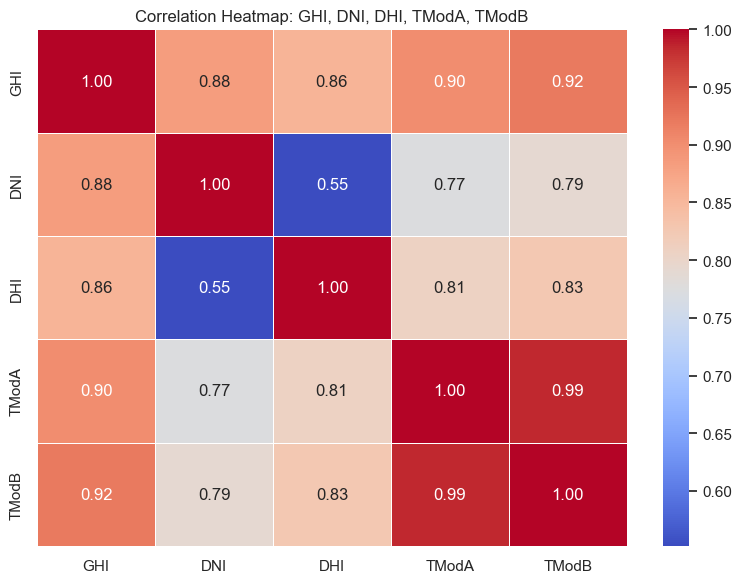

In [37]:
## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)




# Select relevant columns
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
# Compute correlation matrix

corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()


## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

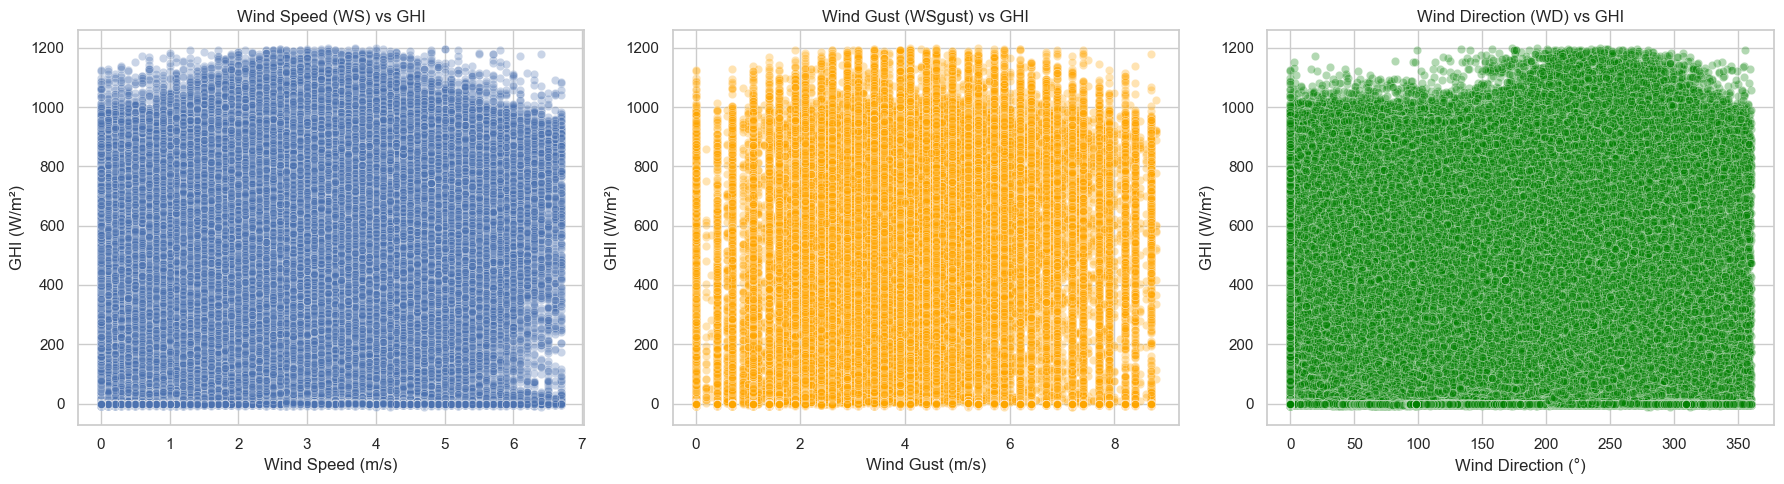

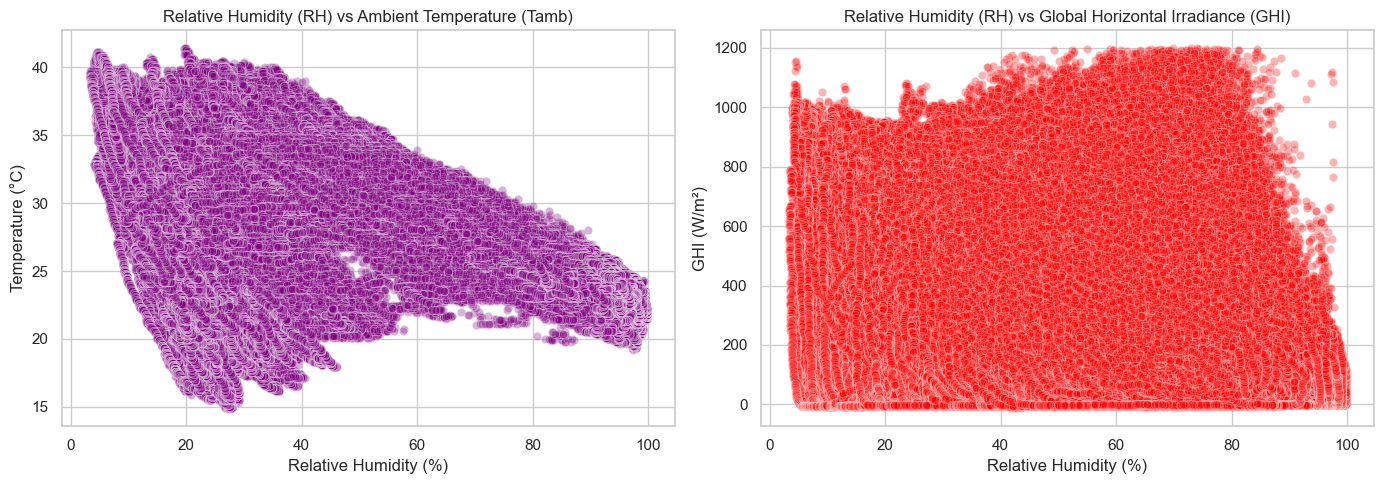

In [39]:
## Scatter Plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI

# Set the visual style
sns.set(style="whitegrid", context="notebook")

# 1. WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.3, ax=axes[0])
axes[0].set_title("Wind Speed (WS) vs GHI")
axes[0].set_xlabel("Wind Speed (m/s)")
axes[0].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WSgust", y="GHI", alpha=0.3, ax=axes[1], color="orange")
axes[1].set_title("Wind Gust (WSgust) vs GHI")
axes[1].set_xlabel("Wind Gust (m/s)")
axes[1].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WD", y="GHI", alpha=0.3, ax=axes[2], color="green")
axes[2].set_title("Wind Direction (WD) vs GHI")
axes[2].set_xlabel("Wind Direction (°)")
axes[2].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()

# 2. RH vs Tamb and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.3, ax=axes[0], color="purple")
axes[0].set_title("Relative Humidity (RH) vs Ambient Temperature (Tamb)")
axes[0].set_xlabel("Relative Humidity (%)")
axes[0].set_ylabel("Temperature (°C)")

sns.scatterplot(data=df_clean, x="RH", y="GHI", alpha=0.3, ax=axes[1], color="red")
axes[1].set_title("Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)")
axes[1].set_xlabel("Relative Humidity (%)")
axes[1].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


## Wind & Distribution Analysis

## Wind rose or radial bar plot of WS/WD

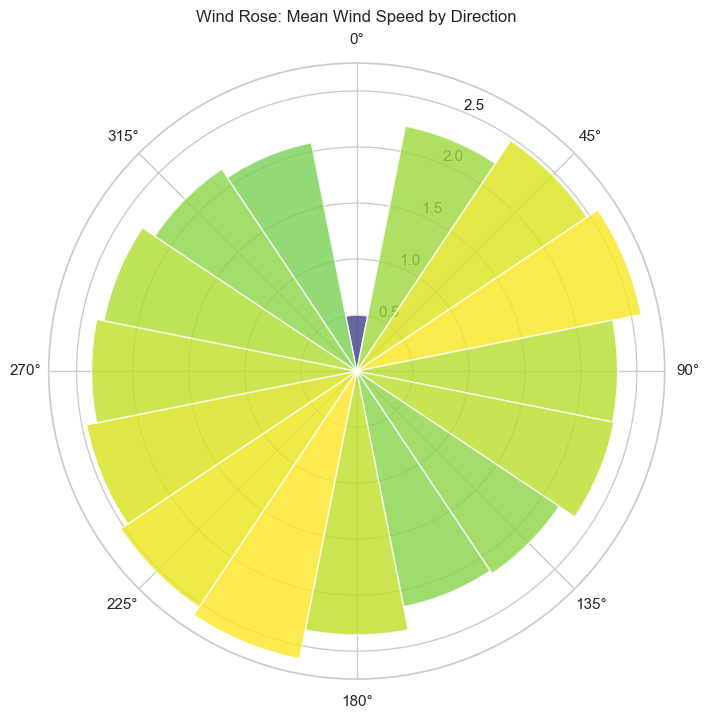

In [40]:
## Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD

import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs for safety
wind_data = df_clean[['WD', 'WS']].dropna()

# Convert degrees to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_data['WD'])

# Define wind speed bins
speed_bins = [0, 2, 4, 6, 8, 10, 12, 20]
wind_data['WS_bin'] = pd.cut(wind_data['WS'], bins=speed_bins, labels=speed_bins[1:])

# Calculate frequency of each direction bin
num_bins = 16  # divide full circle into 16 sectors (22.5° each)
bins = np.linspace(0, 2 * np.pi, num_bins + 1)
wind_data['dir_bin'] = pd.cut(wind_dir_rad, bins=bins, labels=False, include_lowest=True)

# Average WS per direction bin
wind_mean = wind_data.groupby('dir_bin')['WS'].mean()
angles = np.linspace(0, 2 * np.pi, num_bins, endpoint=False)

# Plot wind rose
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, wind_mean, width=2*np.pi/num_bins, color=plt.cm.viridis(wind_mean / wind_mean.max()), alpha=0.8)

ax.set_theta_zero_location("N")  # 0° at north
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Wind Rose: Mean Wind Speed by Direction", va='bottom')

plt.show()


## Histograms for GHI and one other variable (e.g., WS)

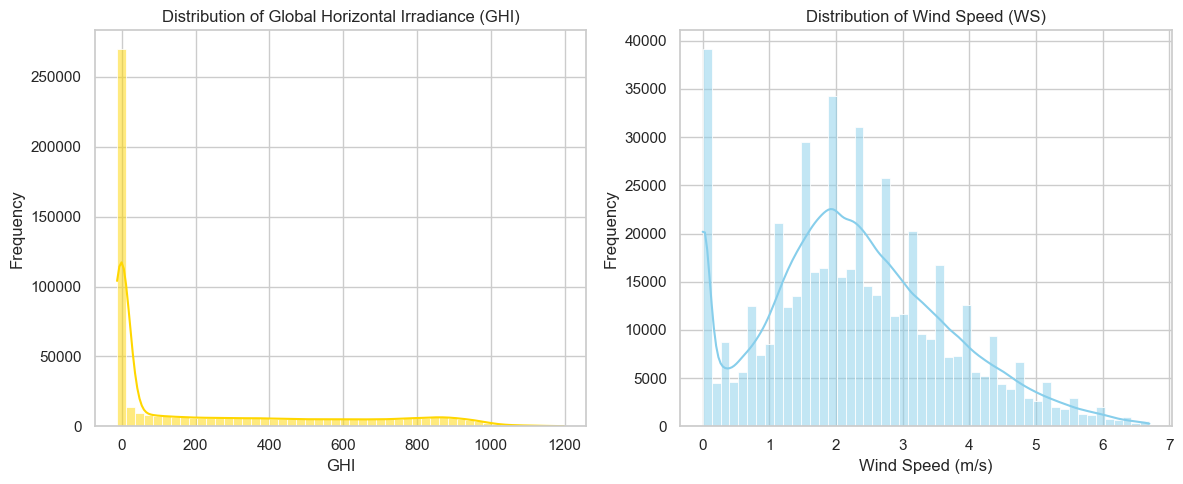

In [41]:
## Distribution Analysis
## Histograms for GHI and WS

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=50, kde=True, color='gold')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Temperature Analysis

## Examine how relative humidity (RH) might influence temperature readings and solar radiation

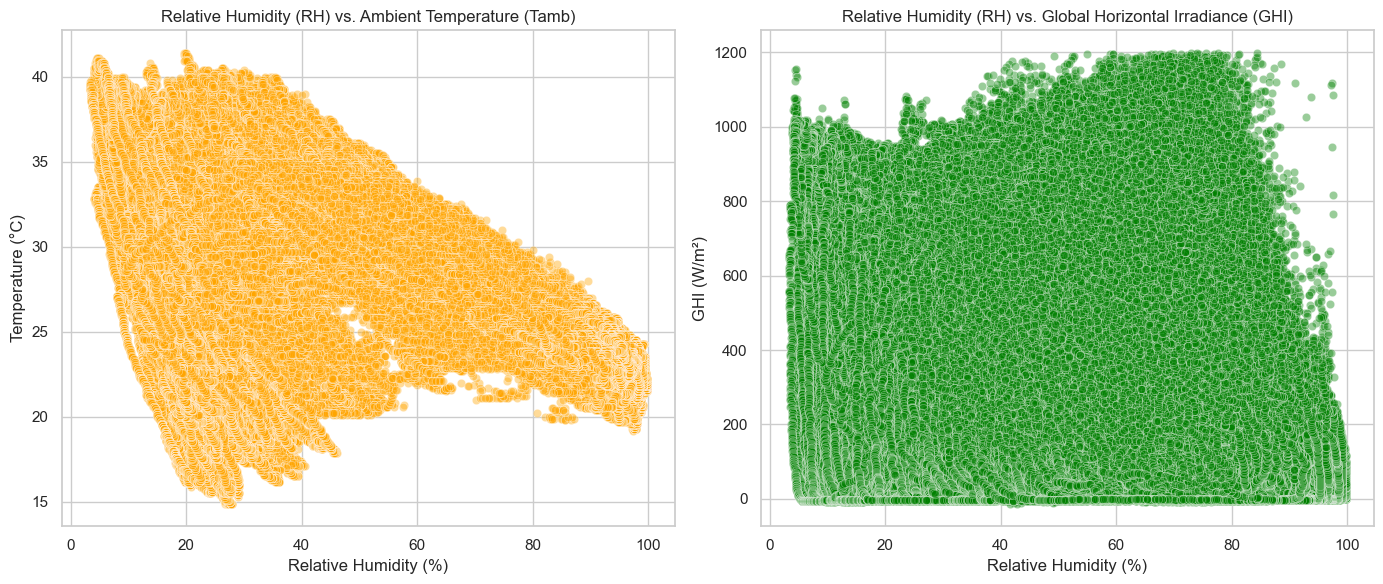

In [33]:
## Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot: RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.4, color='orange')
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# Scatter plot: RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.4, color='green')
plt.title('Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()


## Bubble Chart

## GHI vs. Tamb with bubble size = RH or BP

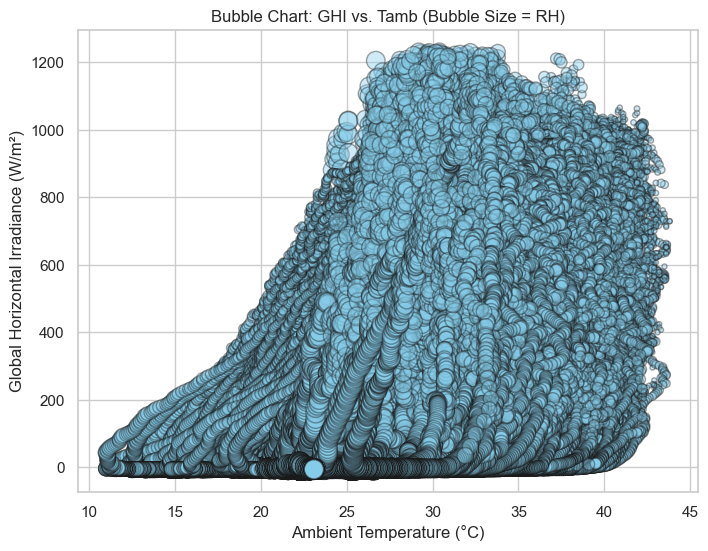

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'] * 2,   # Scale bubble size for visibility
            alpha=0.4, c='skyblue', edgecolors='k')

plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.show()
